Created by Randall Fowler for EEC 266 Final Project

# Plot results from Machine Learning Models
Select whether to save plot or not by setting savePlot variable to true or false. Results will be saved in the Figures folder in the same directory as this file.

This script will create figures for the results that were not averaged as well as the averaging of 10 runs. To get seperate figures for each dataset, scroll down to see an additional code block.

Isolet dataset with averaging over 1 runs.
ORL dataset with averaging over 1 runs.
RELATHE dataset with averaging over 1 runs.
Yale dataset with averaging over 1 runs.


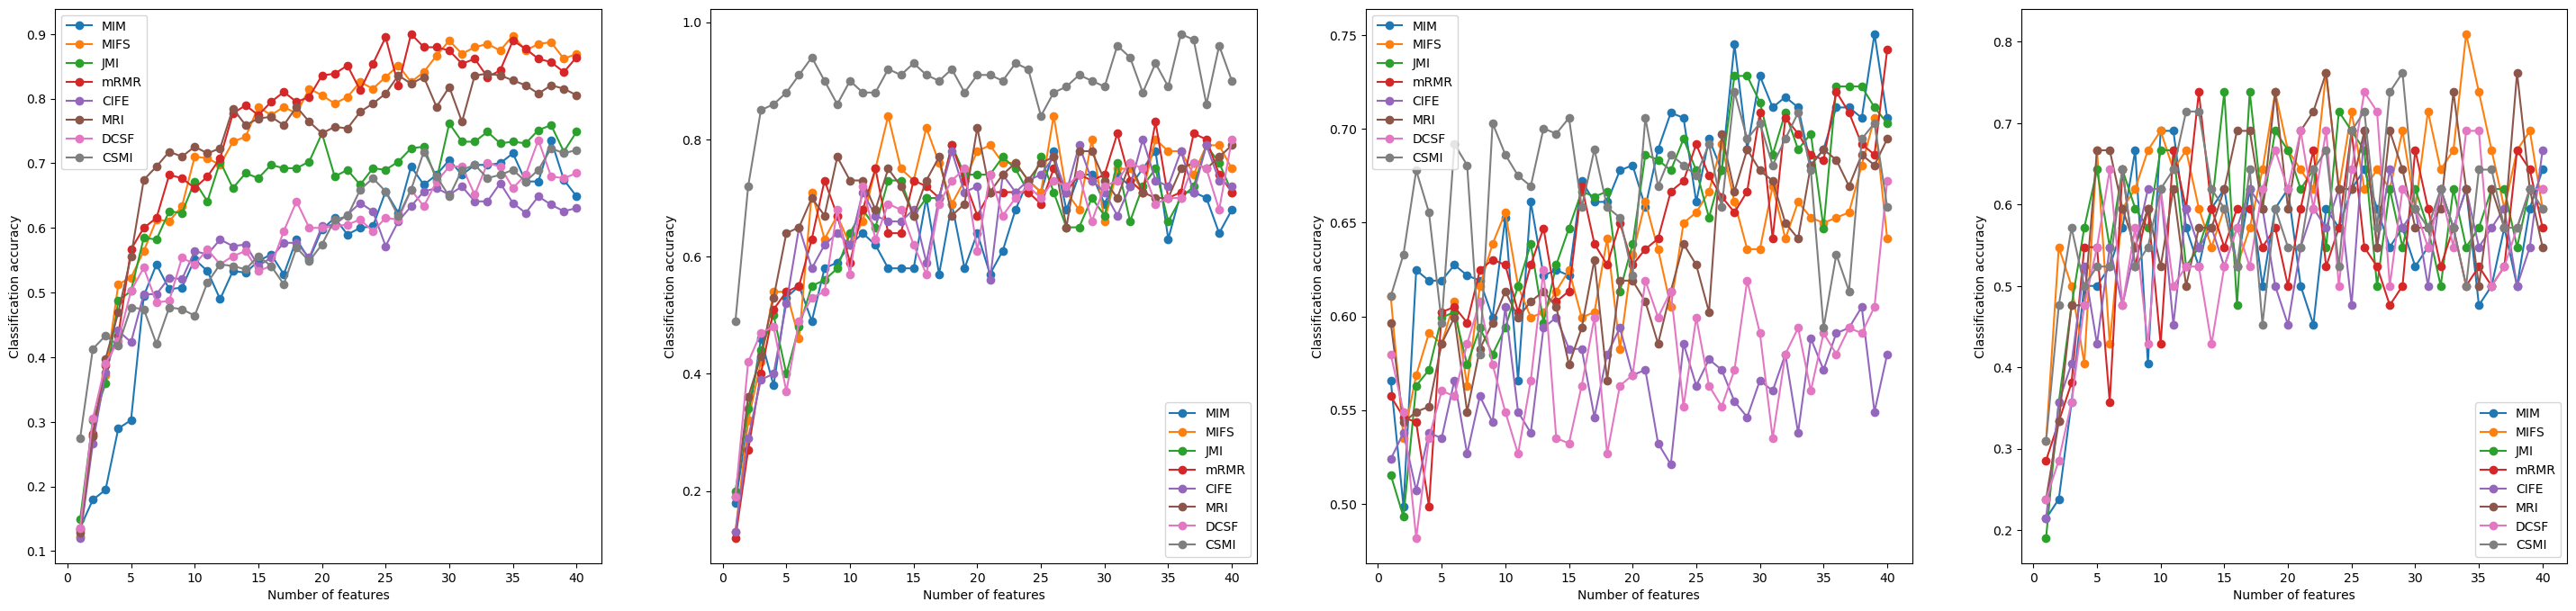

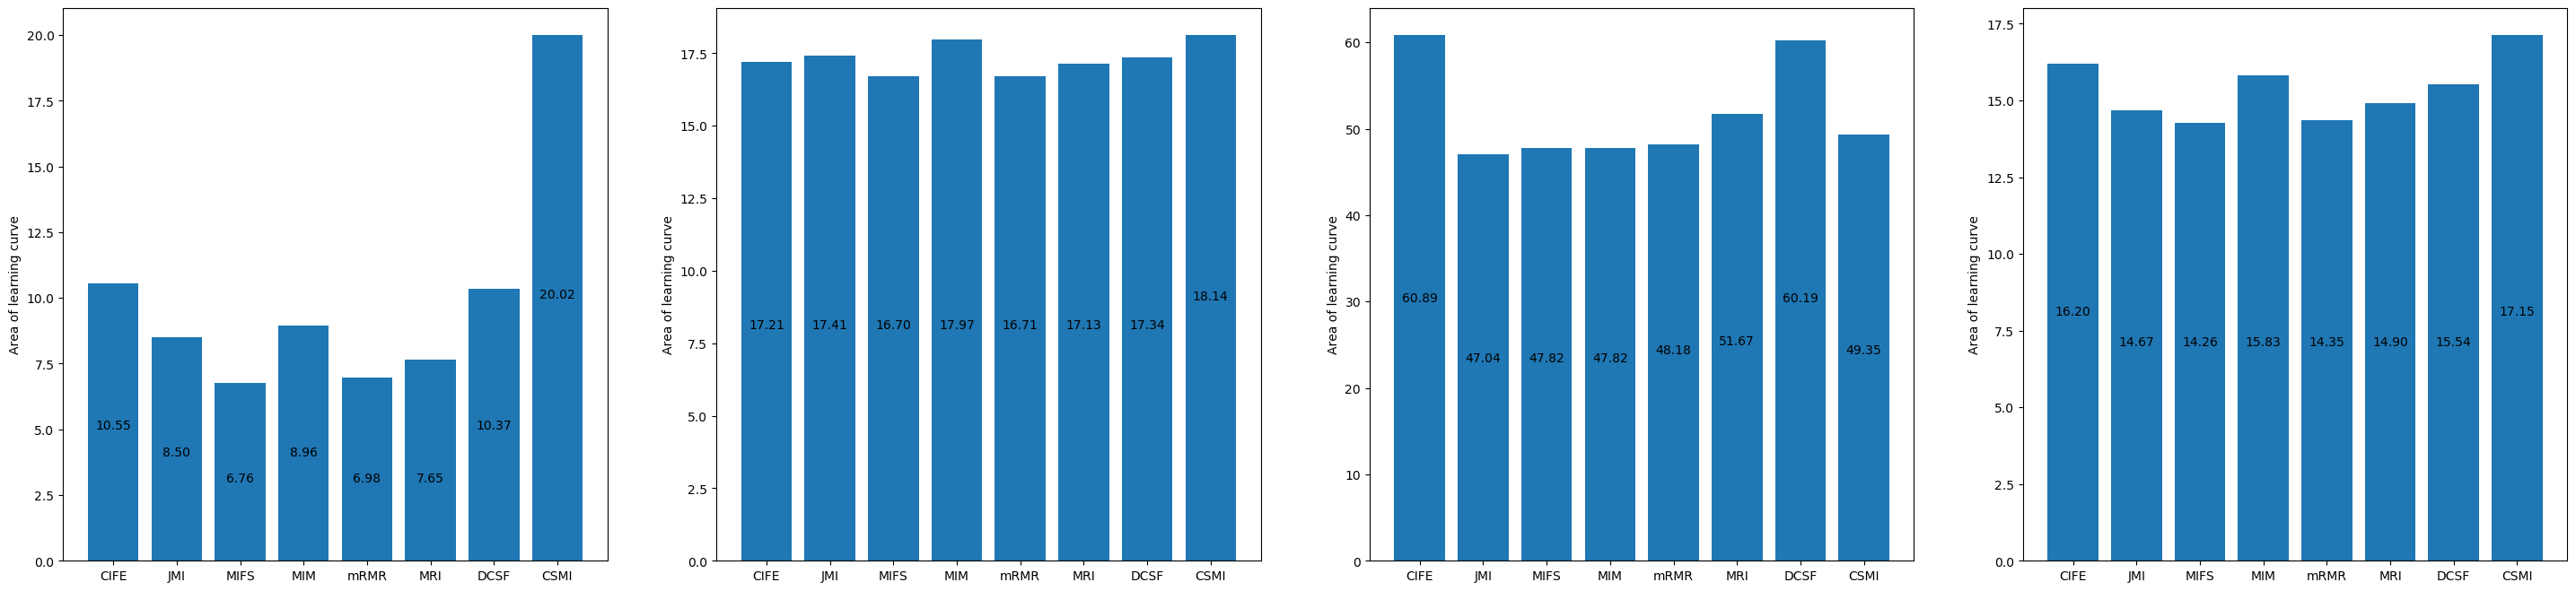

Isolet dataset with averaging over 10 runs.
ORL dataset with averaging over 10 runs.
RELATHE dataset with averaging over 10 runs.
Couldn't plot RELATHE with average of 10 for accuracy.
Yale dataset with averaging over 10 runs.


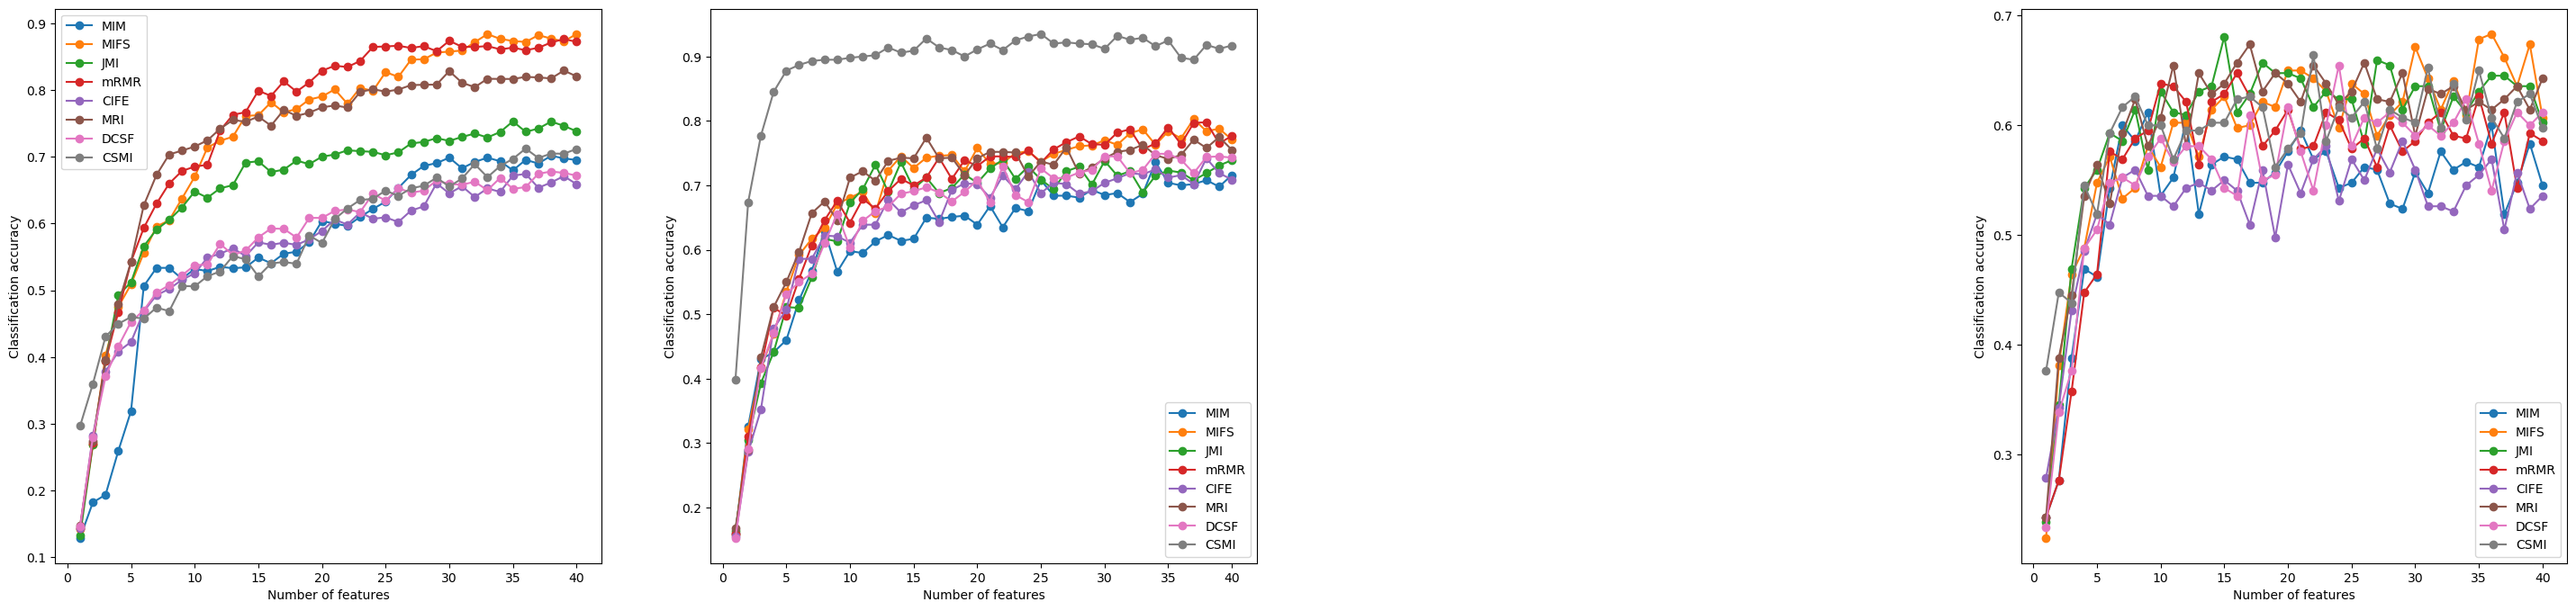

Couldn't plot RELATHE with average of 10 for Goodness-of-Fit.


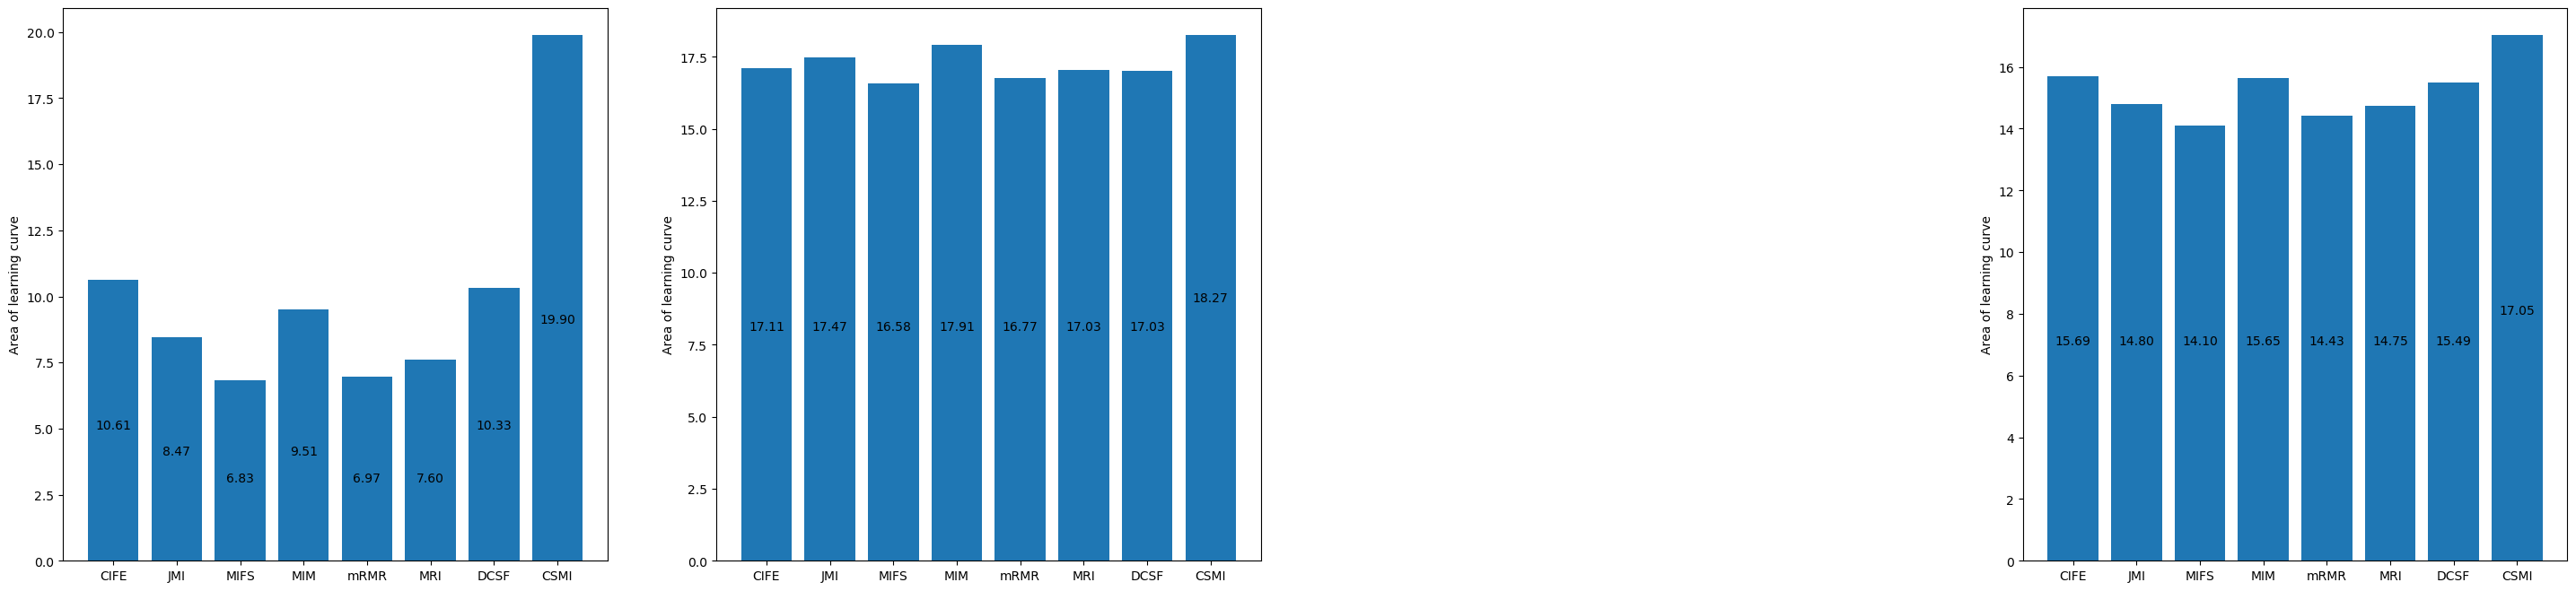

In [1]:
import os
import numpy as np
from matplotlib import pyplot

savePlot = True

setNames = ["Isolet","ORL","RELATHE","Yale"]
ITFS_Methods = ["MIM", "MIFS", "JMI", "mRMR", "CIFE", "MRI", "DCSF", "CSMI"]
gof_key = [4,2,1,0,3,5,6,7]
plotPath = os.path.join(os.getcwd(),"Plot")
savePath = os.path.join(os.getcwd(),"Figures")

xshift = range(1,41)
for avg in [1,10]:#,100]:
    pyplot.figure(figsize=(36,8))
    for p, setName in enumerate(setNames):
        try:
            print(f"{setName} dataset with averaging over {avg} runs.")
            
            classify_acc = np.load(os.path.join(plotPath, setName+f"_acc{avg}.npy"))

            pyplot.subplot(1,4,p+1)
            for i in range(len(ITFS_Methods)):
                pyplot.plot(xshift, classify_acc[i,:], 'o-', label=ITFS_Methods[i])

            pyplot.legend()
            pyplot.xlabel("Number of features")
            pyplot.ylabel("Classification accuracy")

        except:
            print(f"Couldn't plot {setName} with average of {avg} for accuracy.")

    if(savePlot):
        pyplot.savefig(os.path.join(savePath, f"Accuracy{avg}.png"))     
    pyplot.show()


    pyplot.figure(figsize=(36,8))
    for p, setName in enumerate(setNames):
        try:
            GoF = np.load(os.path.join(plotPath, setName+f"_gof{avg}.npy"))
            GoF = GoF[gof_key]
            ifts_methods = [ITFS_Methods[m] for m in gof_key]

            pyplot.subplot(1,4,p+1)
            pyplot.bar(ifts_methods,GoF)
            pyplot.ylabel("Area of learning curve")
            for i in range(len(GoF)):
                pyplot.text(i, GoF[i]//2, f"{GoF[i]:.2f}", ha='center')
        except:
            print(f"Couldn't plot {setName} with average of {avg} for Goodness-of-Fit.")
    if(savePlot):
        pyplot.savefig(os.path.join(savePath, f"GoF{avg}.png")) 
    pyplot.show()

## Plot seperate figures
Run this script to create seperate figures for each dataset. This was used for creating figures for the paper submission.

Isolet dataset with averaging over 1 runs.


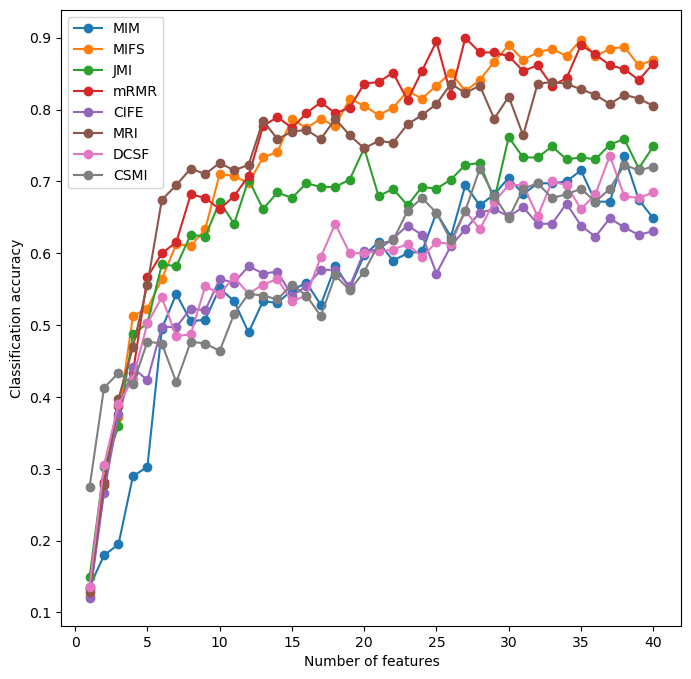

ORL dataset with averaging over 1 runs.


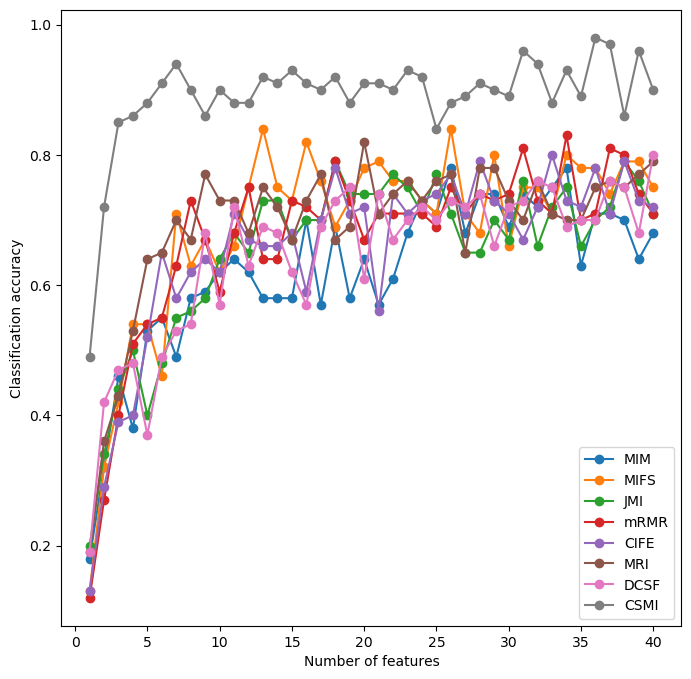

RELATHE dataset with averaging over 1 runs.


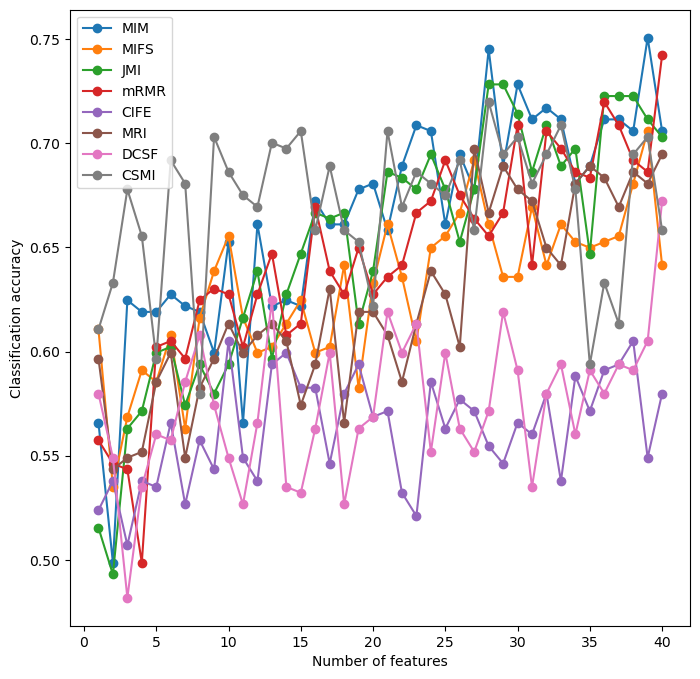

Yale dataset with averaging over 1 runs.


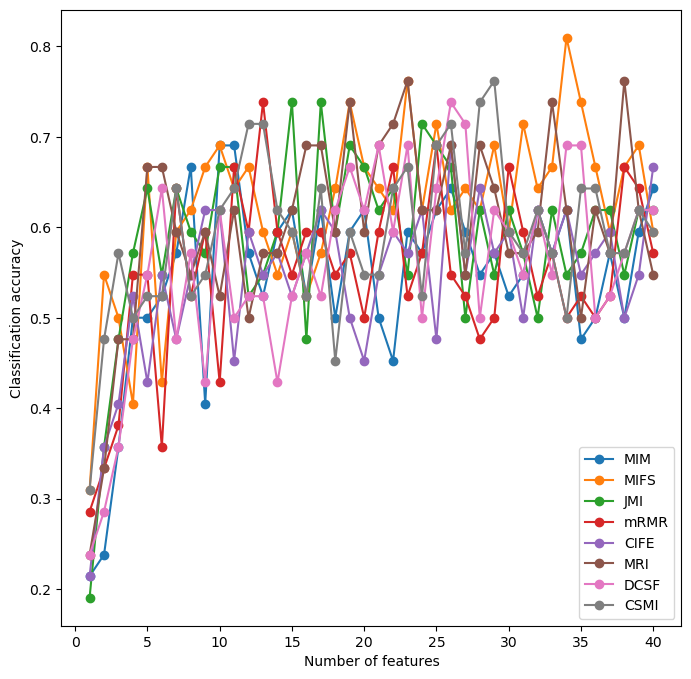

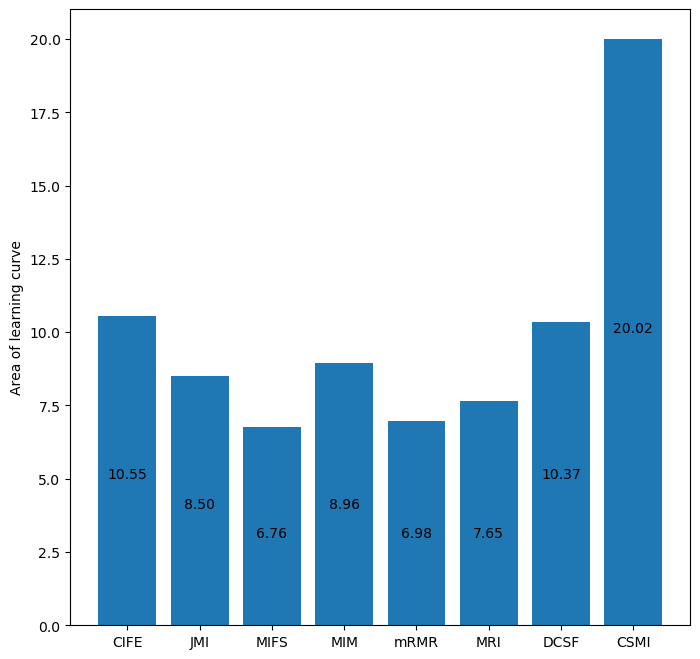

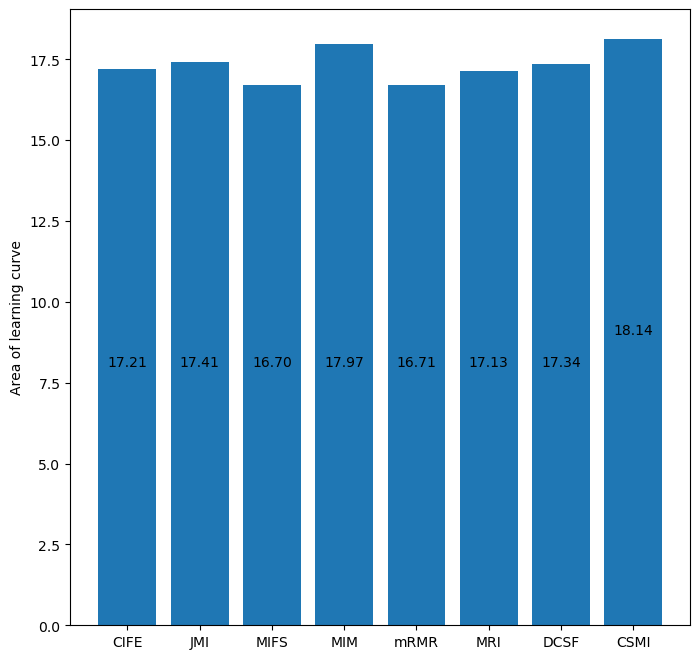

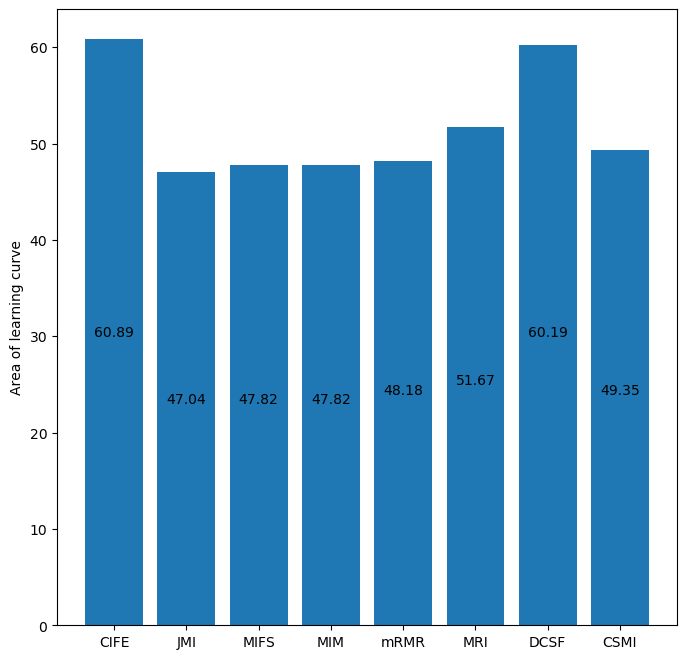

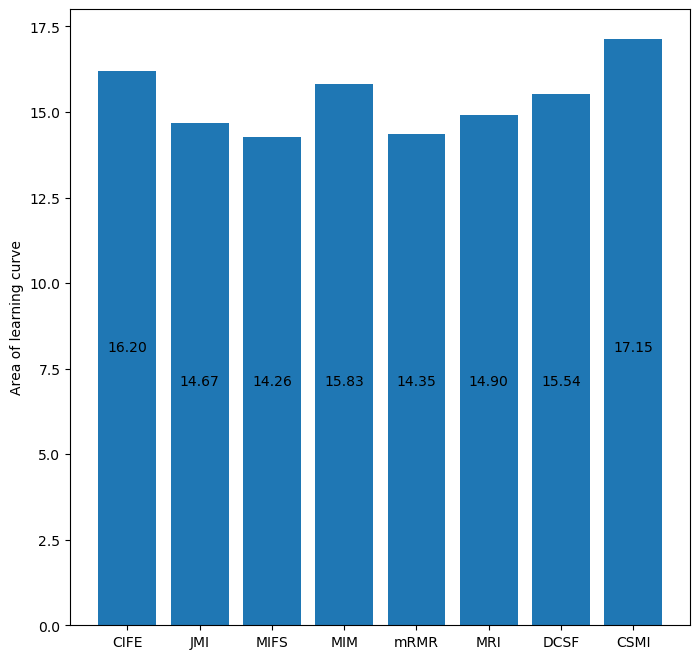

Isolet dataset with averaging over 10 runs.


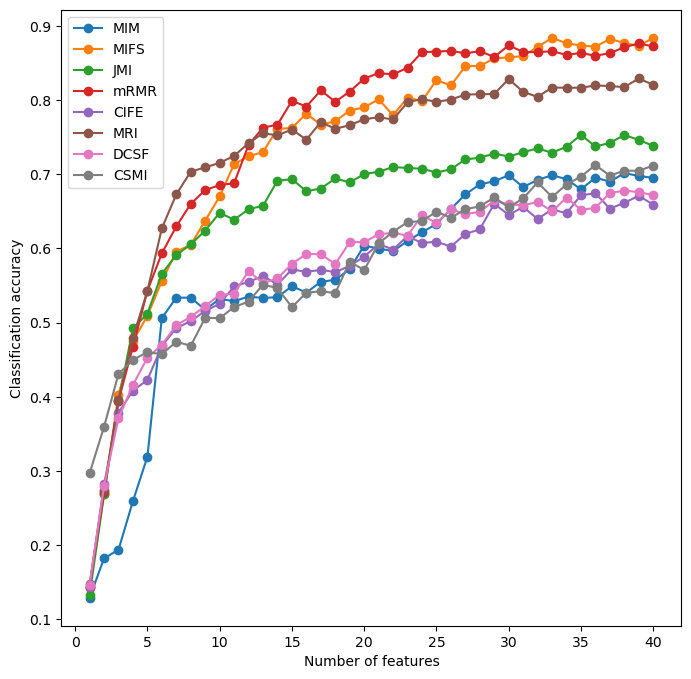

ORL dataset with averaging over 10 runs.


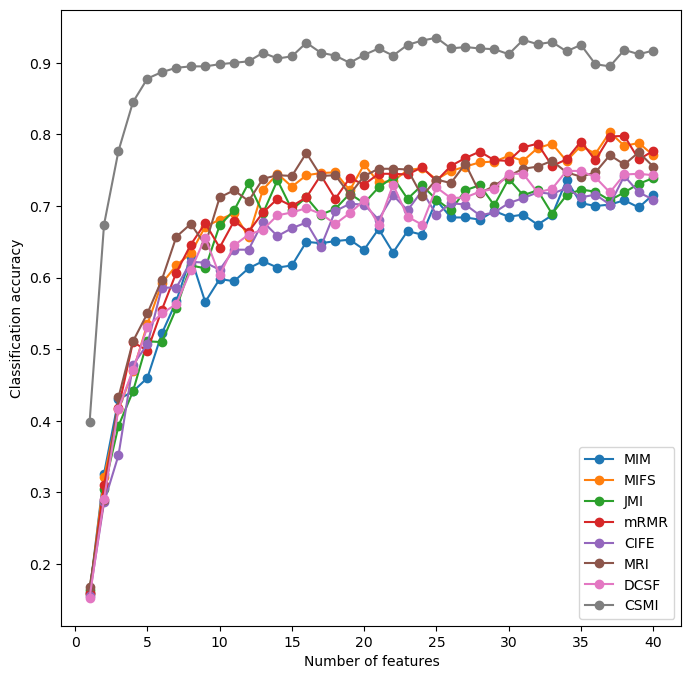

RELATHE dataset with averaging over 10 runs.
Couldn't plot RELATHE with average of 10 for accuracy.
Yale dataset with averaging over 10 runs.


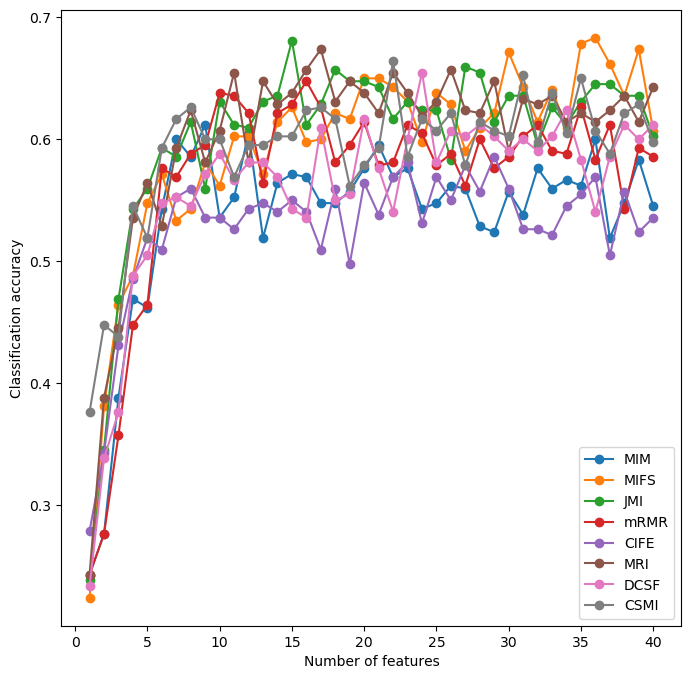

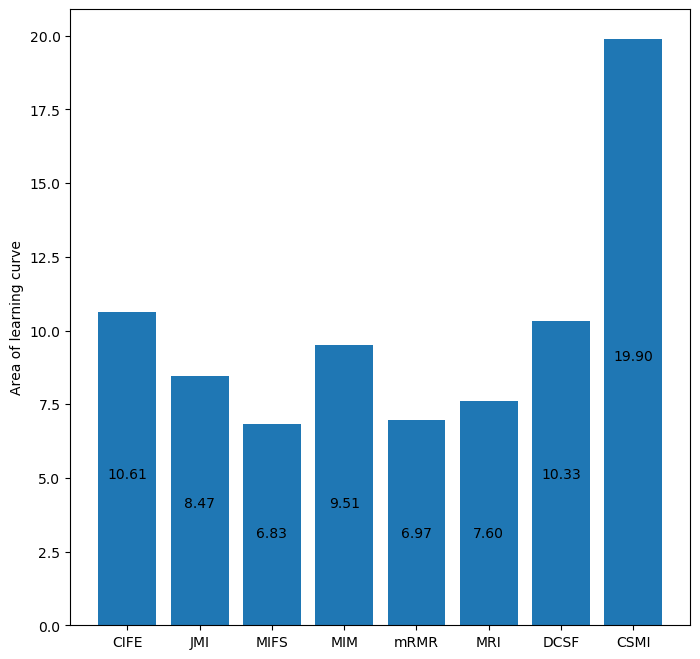

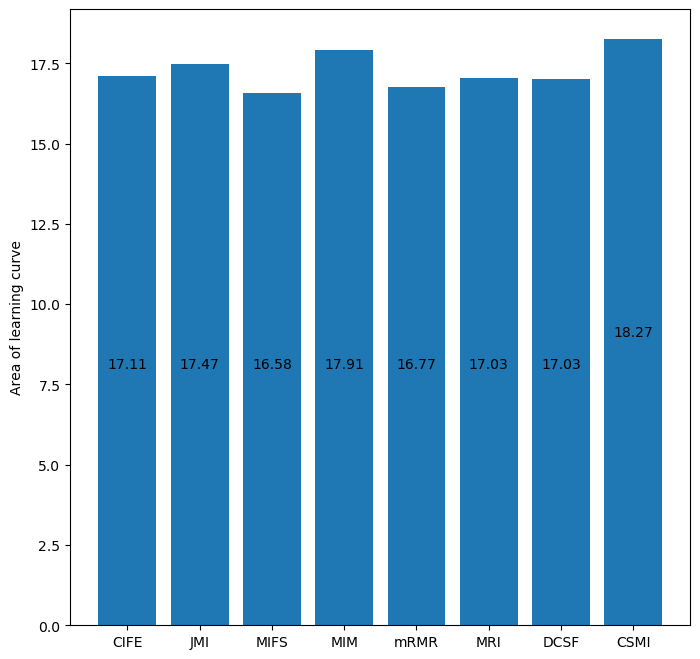

Couldn't plot RELATHE with average of 10 for Goodness-of-Fit.


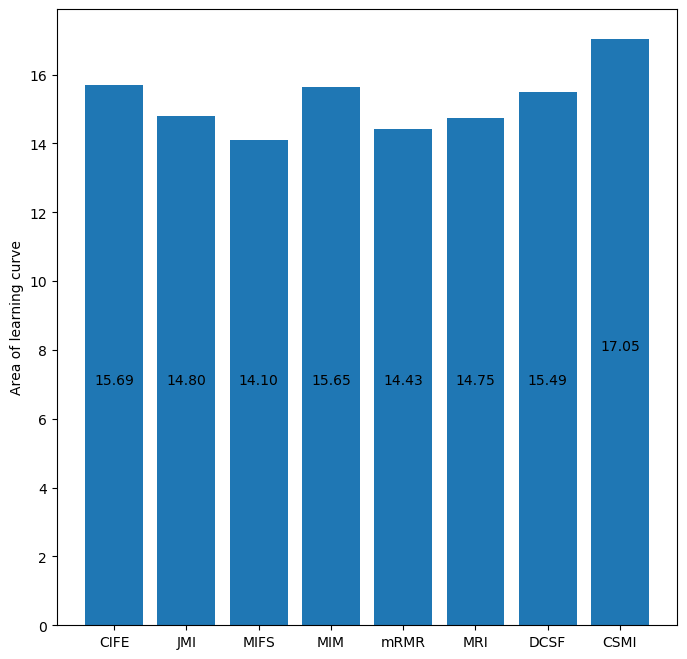

In [2]:
import os
import numpy as np
from matplotlib import pyplot

savePlot = True

setNames = ["Isolet","ORL","RELATHE","Yale"]
ITFS_Methods = ["MIM", "MIFS", "JMI", "mRMR", "CIFE", "MRI", "DCSF", "CSMI"]
gof_key = [4,2,1,0,3,5,6,7]
plotPath = os.path.join(os.getcwd(),"Plot")
savePath = os.path.join(os.getcwd(),"Figures")

xshift = range(1,41)
for avg in [1,10]:#,100]:
    for p, setName in enumerate(setNames):
        try:
            print(f"{setName} dataset with averaging over {avg} runs.")
            
            classify_acc = np.load(os.path.join(plotPath, setName+f"_acc{avg}.npy"))

            pyplot.figure(figsize=(8,8))
            for i in range(len(ITFS_Methods)):
                pyplot.plot(xshift, classify_acc[i,:], 'o-', label=ITFS_Methods[i])

            pyplot.legend()
            pyplot.xlabel("Number of features")
            pyplot.ylabel("Classification accuracy")

            if(savePlot):
                pyplot.savefig(os.path.join(savePath, setName+f"_acc{avg}.png"))     
            pyplot.show()

        except:
            print(f"Couldn't plot {setName} with average of {avg} for accuracy.")

    for p, setName in enumerate(setNames):
        try:
            GoF = np.load(os.path.join(plotPath, setName+f"_gof{avg}.npy"))
            GoF = GoF[gof_key]
            ifts_methods = [ITFS_Methods[m] for m in gof_key]

            pyplot.figure(figsize=(8,8))
            pyplot.bar(ifts_methods,GoF)
            pyplot.ylabel("Area of learning curve")
            for i in range(len(GoF)):
                pyplot.text(i, GoF[i]//2, f"{GoF[i]:.2f}", ha='center')

            if(savePlot):
                pyplot.savefig(os.path.join(savePath, setName+f"_gof{avg}.png")) 
            pyplot.show()
        except:
            print(f"Couldn't plot {setName} with average of {avg} for Goodness-of-Fit.")